In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [2]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
393,24/11/2020 19:15:02,30.0,Male,Moscow,Software Engineer,5,0,Middle,C,C/C++,14712.0,0,30,Full-time employee,Unlimited contract,Russian,101-1000,Product
394,24/11/2020 19:15:49,33.0,Male,Berlin,Product Manager,5,5,Senior,NaN,Python,70000.0,800,30,Full-time employee,NaN,German,101-1000,Product
395,24/11/2020 19:19:30,35.0,Male,Berlin,QA Engineer,11,10,Senior,Java,"Python, Javascript / Typescript, .NET, Java / ...",74400.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


## Construct Target by adding salary and bonus. 

In [4]:
df["Bonus"] = pd.to_numeric(df["Yearly bonus + stocks in EUR"], downcast="float", errors="coerce")
df["Bonus"].fillna(0, inplace=True)
df["target"] = df["Yearly brutto salary (without bonus and stocks) in EUR"] + df["Bonus"]
df.drop(columns={"Timestamp","Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Bonus"}, inplace=True)
df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0


In [5]:
# Making a sample of the data. Since we have 1253, let's get 30% as a sample size. That's a sample size of about 376.
df_ = df.sample(376)

191
-4780032416.949636
(376, 561) (376, 1)


[Text(0.98989898989899, 0.9973958333333334, 'x[0] <= inf\nsquared_error = 3.533518525494981e+19\nsamples = 282\nvalue = 354693756.422'),
 Text(0.9848484848484849, 0.9921875, 'x[244] <= 0.5\nsquared_error = 1658002020.932\nsamples = 278\nvalue = 84324.464'),
 Text(0.9797979797979798, 0.9869791666666666, 'x[192] <= 0.5\nsquared_error = 1571581157.623\nsamples = 277\nvalue = 84069.318'),
 Text(0.9747474747474747, 0.9817708333333334, 'x[289] <= 0.5\nsquared_error = 1623925984.946\nsamples = 276\nvalue = 84091.308'),
 Text(0.9696969696969697, 0.9765625, 'x[258] <= 0.5\nsquared_error = 1550672201.981\nsamples = 275\nvalue = 83789.822'),
 Text(0.9646464646464646, 0.9713541666666666, 'x[163] <= 0.5\nsquared_error = 1533638838.946\nsamples = 274\nvalue = 83493.434'),
 Text(0.9595959595959596, 0.9661458333333334, 'x[415] <= 0.5\nsquared_error = 1605677072.946\nsamples = 273\nvalue = 83619.784'),
 Text(0.9545454545454546, 0.9609375, 'x[153] <= 0.5\nsquared_error = 1580448215.188\nsamples = 271\nv

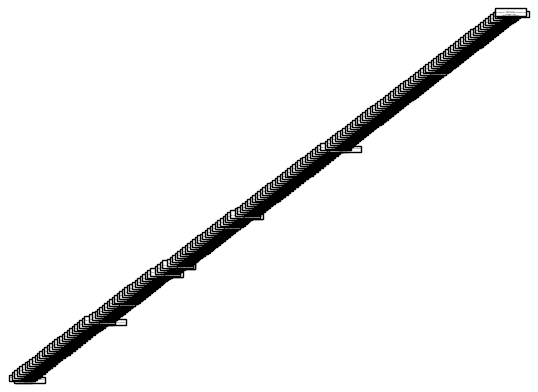

In [6]:
# Using a generic baseline model, I can use this as a way to compare what doing nothing will do.
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
#Generate Model
df2 = pd.get_dummies(df_, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print(clf.score(X_test, y_test))
print(X.shape, y.shape)
plot_tree(clf)

# Cleaning Up Data
Looking at variable information to look for some cleaning up to do. 

In [7]:
# Looking at variable information to look for some cleaning up to do.
#df.info()
#df["Age"].value_counts()
#df["Gender"].value_counts()
#df["City"].value_counts()
#df["Position"].value_counts()
#df["Total years of experience"].value_counts()
#df["Years of experience in Germany"].value_counts()
#df["Seniority level"].value_counts())
#df["Your main technology / programming language"].value_counts()
df["Other technologies/programming languages you use often"].value_counts()
#df["Number of vacation days"].value_counts()
#df["Employment status"].value_counts()
#df["Сontract duration"].value_counts()
#df["Main language at work"].value_counts()
#df["Company size"].value_counts()
#df["Company type"].value_counts()

Javascript / Typescript                                                                   44
Python                                                                                    37
SQL                                                                                       31
AWS, Docker                                                                               16
Kotlin                                                                                    15
                                                                                          ..
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer     1
Kotlin, SQL, AWS, Kubernetes, Docker                                                       1
Python, R, Go                                                                              1
C/C++, PHP, SQL                                                                            1
Python, AWS, Kubernetes, Docker, terraform, ansible                   

First look through at the value counts, I decided to drop Other technology since there is a lot of different variables that are pretty similar and will be hard to clean up spelling errors and group types. So for ease, I just decided to drop it. 

In [8]:
df.drop(columns={"Other technologies/programming languages you use often"}, inplace=True)


### Dealing with Nulls

In [9]:
# Finding nulls through the data
df.isnull().sum()

Age                                             27
Gender                                          10
City                                             0
Position                                         6
Total years of experience                       16
Years of experience in Germany                  32
Seniority level                                 12
Your main technology / programming language    127
Number of vacation days                         68
Employment status                               17
Сontract duration                               29
Main language at work                           16
Company size                                    18
Company type                                    25
target                                           0
dtype: int64

Plan: 
- Without nulls: City
- Want to replace nulls: Age, Position, Total years of experience, Years in Germanry, Seniority Level, Programming Laguage, Vacation Days, Status, Contract, Langauge, Compnay Size

In [10]:
def replace_null(data):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
replace_null(df)

In [12]:
df["Gender"].value_counts()

Male       1059
Female      192
Diverse       2
Name: Gender, dtype: int64

In [13]:
df.isnull().sum()

Age                                            0
Gender                                         0
City                                           0
Position                                       0
Total years of experience                      0
Years of experience in Germany                 0
Seniority level                                0
Your main technology / programming language    0
Number of vacation days                        0
Employment status                              0
Сontract duration                              0
Main language at work                          0
Company size                                   0
Company type                                   0
target                                         0
dtype: int64

In [14]:
df["Company type"].value_counts()

Product                785
Startup                252
Consulting / Agency    142
Bank                     5
Media                    3
                      ... 
Publisher                1
Energy                   1
Enterprise               1
service                  1
eCommerce                1
Name: Company type, Length: 63, dtype: int64

### Cleaning up some values for consistentcy
- Clean up: (To make it easier, look for columns with small amount of differnt values)
    - Seniority Level
    - Years of experience in Germany
    - Total years of experience
    - Number of Vacation Days
    - Employment Status
    - Contract Duration
    - Language at Work

In [15]:
df["Seniority level"].replace(["student", "Working Student", "Student"], 
                                              "Student", inplace = True)
df["Seniority level"].value_counts()

Senior                                       577
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Student                                        3
Principal                                      3
C-level executive manager                      1
Intern                                         1
Entry level                                    1
C-Level                                        1
no idea, there are no ranges in the firm       1
intern                                         1
Director                                       1
Key                                            1
No level                                       1
CTO                                            1
Work Center Manager                            1
Manager                                        1
VP                                             1
No level            

In [16]:
df["Years of experience in Germany"].value_counts()
df["Years of experience in Germany"].replace(["4 (in Switzerland), 0 (in Germany)", "0,5", "1,5", "2,5", "3,5", "6 (not as a data scientist, but as a lab scientist)"], 
                                              ["0", "0.5", "1.5", "2.5", "3.5", "6"], inplace = True)
df["Years of experience in Germany"].replace(["⁰", "<1", "0.1", "3 (in Poland)", "0.2", "0,3", "3 months", "4 month", "< 1", "0.9", "0.8", "0.4"], 
                                              "less than year", inplace = True)
df["Years of experience in Germany"].replace(["0", "0.5", "0.25", "-"], 
                                              "less than year", inplace = True)
df["Years of experience in Germany"].replace(["1,7", "4,5"], 
                                              ["1.7", "4.5"], inplace = True)
df["Years of experience in Germany"].value_counts()
#df['Browser'].value_counts().to_frame()

2                 227
1                 189
3                 155
5                 142
less than year    134
4                 122
6                  71
7                  37
1.5                29
10                 29
9                  20
8                  17
12                 12
2.5                12
3.5                11
15                  8
11                  7
20                  7
14                  5
13                  4
30                  3
18                  2
4.5                 2
19                  2
1.7                 1
25                  1
16                  1
17                  1
26                  1
2.6                 1
Name: Years of experience in Germany, dtype: int64

In [17]:
df["Total years of experience"].value_counts()
df["Total years of experience"].replace(["1,5", "6 (not as a data scientist, but as a lab scientist)", 
                                         "15, thereof 8 as CTO", "1 (as QA Engineer) / 11 in total", "less than year", "2,5", "383"], 
                                              ["1.5", "6", "15", "11", "0", "2.5", "30"], inplace = True)
df["Total years of experience"].value_counts()
df["Total years of experience"]= pd.to_numeric(df["Total years of experience"], errors = 'coerce')
df["Total years of experience"].apply(np.ceil)
df["Total years of experience"].value_counts()

10.0    154
5.0     136
6.0     100
8.0      92
7.0      84
4.0      80
12.0     67
3.0      66
15.0     64
9.0      60
2.0      57
11.0     44
13.0     41
14.0     39
1.0      31
20.0     28
16.0     20
18.0     16
17.0     12
19.0      7
0.0       7
25.0      7
22.0      5
30.0      5
2.5       5
1.5       4
21.0      3
23.0      2
27.0      2
4.5       2
3.5       2
0.8       2
5.5       1
6.5       1
28.0      1
29.0      1
24.0      1
40.0      1
26.0      1
31.0      1
7.5       1
Name: Total years of experience, dtype: int64

In [20]:
df["Number of vacation days"].replace(["unlimited", "Unlimited ", "unlimited ", "30 in contract (but theoretically unlimited)", "Unlimited"], 
                                              "365", inplace = True)
df["Number of vacation days"].replace(["24 labour days", "37.5", "23+", "(no idea)", "~25"], 
                                              [24, 38, 23, 30, 25], inplace = True)
df["Number of vacation days"]= pd.to_numeric(df["Number of vacation days"], errors = 'coerce')
df["Number of vacation days"].value_counts()

30     557
28     233
27     102
25      92
26      71
24      68
29      24
20      13
365     10
21      10
31       8
22       8
32       8
36       5
23       5
35       5
40       4
0        4
14       3
45       3
33       3
15       2
38       2
12       2
60       1
16       1
3        1
50       1
99       1
1        1
5        1
37       1
39       1
34       1
10       1
Name: Number of vacation days, dtype: int64

In [23]:
df["Employment status"].replace(["working student", "Working Student", "Werkstudent"], 
                                              "Working Student", inplace = True)
df["Employment status"].replace(["Company Director", "Founder", "Full-time position, part-time position, & self-employed (freelancing, tutoring)",
                                "full-time, but 32 hours per week (it was my request, I'm a student)"], 
                                              "Full-time employee", inplace = True)
df["Employment status"].value_counts()

Full-time employee            1213
Self-employed (freelancer)      28
Part-time employee               8
Working Student                  3
Intern                           1
Name: Employment status, dtype: int64

In [27]:
df["Сontract duration"].replace("0", "Unlimited contract", inplace = True)
df["Сontract duration"].value_counts()

Unlimited contract    1189
Temporary contract      64
Name: Сontract duration, dtype: int64

In [29]:
df["Main language at work"].replace(["50/50", "both"], "English and German", inplace = True)
df["Main language at work"].value_counts()

English               1036
German                 186
Russian                 12
English and German       4
Italian                  3
Spanish                  3
Polish                   2
Русский                  2
Czech                    2
Deuglisch                1
French                   1
Russian, English         1
Name: Main language at work, dtype: int64

### Dealing with Outliers
Clean:(To make it easier to have less variables)
- Position
- City
- Main Technology
- Seniority Level
- Language
- Compnay Type

In [33]:
# Using this to remove outliers in the data for categorical data
def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

In [35]:
df["Your main technology / programming language"] = replace_low_freq(df, "Your main technology / programming language", 10, "Other")
df["City"] = replace_low_freq(df, "City", 10, "Other")
df["Position "] = replace_low_freq(df, "Position ", 10, "Other")
df["Seniority level"] = replace_low_freq(df, "Seniority level", 10, "Other")
df["Main language at work"] = replace_low_freq(df, "Main language at work", 10, "Other")

# Answers and Explainations


### Results

### Feature Selection Activities

### Hyperparameter Changes

In [42]:
df_new

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5.0,3,Senior,TypeScript,30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7.0,4,Senior,Ruby,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12.0,6,Lead,Other,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4.0,1,Junior,Javascript,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17.0,6,Senior,Other,29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9.0,5,Senior,Java,26,Full-time employee,Unlimited contract,English,51-100,Product,142000.0
1249,33.0,Male,Berlin,Other,10.0,1.5,Senior,Other,365,Full-time employee,Unlimited contract,English,1000+,Product,63000.0
1250,39.0,Male,Munich,Other,15.0,2,Lead,PHP,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,110000.0
1251,26.0,Male,Other,Frontend Developer,7.0,7,Middle,JavaScript,27,Full-time employee,Unlimited contract,German,101-1000,Product,79300.0


30
-0.8164134485873431
(376, 103) (376, 1)


[Text(0.7590091536960899, 0.9838709677419355, 'x[30] <= 0.5\nsquared_error = 3.533518292860605e+19\nsamples = 282\nvalue = 354697038.997'),
 Text(0.6383405091038765, 0.9516129032258065, 'x[2] <= 41.0\nsquared_error = 3850442012.544\nsamples = 219\nvalue = 89567.001'),
 Text(0.5944146983554288, 0.9193548387096774, 'x[46] <= 0.5\nsquared_error = 2107636451.657\nsamples = 217\nvalue = 86272.687'),
 Text(0.5226731624433629, 0.8870967741935484, 'x[1] <= 8.5\nsquared_error = 1538940404.586\nsamples = 213\nvalue = 83737.902'),
 Text(0.42483533310958216, 0.8548387096774194, 'x[49] <= 0.5\nsquared_error = 682181758.014\nsamples = 106\nvalue = 69423.709'),
 Text(0.340189209598926, 0.8225806451612904, 'x[36] <= 0.5\nsquared_error = 571118498.955\nsamples = 103\nvalue = 67804.982'),
 Text(0.19774710521899647, 0.7903225806451613, 'x[1] <= 4.5\nsquared_error = 388755515.665\nsamples = 93\nvalue = 64784.012'),
 Text(0.1235106561503608, 0.7580645161290323, 'x[0] <= 33.0\nsquared_error = 277408124.87\n

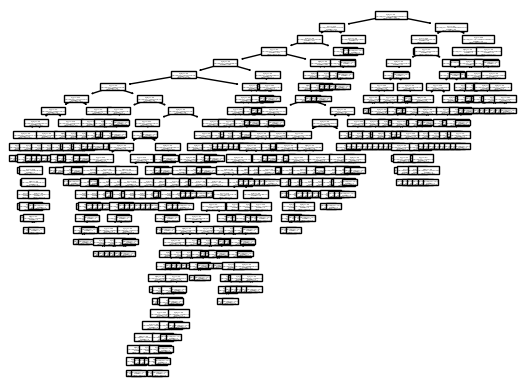

In [46]:
# Making a sample of the data. Since we have 1253, let's get 30% as a sample size. That's a sample size of about 376.
df_new = df
df_train = df_new.sample(376)
# Using a generic baseline model, I can use this as a way to compare what doing nothing will do.
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
#Generate Model
df2 = pd.get_dummies(df_train, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns=["target"]))

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print(clf.score(X_test, y_test))
print(X.shape, y.shape)
plot_tree(clf)